In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

LECTURA DATOS DE JURADOS

In [42]:
data_jurors = pd.read_csv("jurors.csv")
data_jurors.head(2)

,id,trial,trial__id,race,gender,race_source,gender_source,struck_by,strike_eligibility
0,35,1993-9826--Terry L. Landingham,1,White,Male,Jury strike sheet,Jury strike sheet,Struck for cause,NaN
1,38,1993-9826--Terry L. Landingham,1,Black,Female,Jury strike sheet,Jury strike sheet,Struck for cause,NaN


In [43]:
data_jurors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14874 entries, 0 to 14873
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  14874 non-null  int64 
 1   trial               14874 non-null  object
 2   trial__id           14874 non-null  int64 
 3   race                14874 non-null  object
 4   gender              14874 non-null  object
 5   race_source         14874 non-null  object
 6   gender_source       14874 non-null  object
 7   struck_by           14874 non-null  object
 8   strike_eligibility  8111 non-null   object
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In [44]:
#Creación columna año
data_jurors['year'] = data_jurors.trial.str[:4]
data_jurors.year = data_jurors.year.astype('int')

In [45]:
#Eliminación columnas redundantes o de fuentes de datos
data_jurors.drop(columns=['trial','race_source','gender_source'], inplace=True)

In [46]:
data_jurors['race'].value_counts()

White      6241
Unknown    4752
Black      3877
Asian         3
Latino        1
Name: race, dtype: int64

In [47]:
#Selección de las categorías 'Black' y 'White' la columna 'race'
mask_jurors_2 = ['Black', 'White']
data_jurors_mask_2 = data_jurors['race']. apply(lambda x: x in mask_jurors_2)
data_jurors = data_jurors.loc[data_jurors_mask_2]
# data_jurors = data_jurors_3

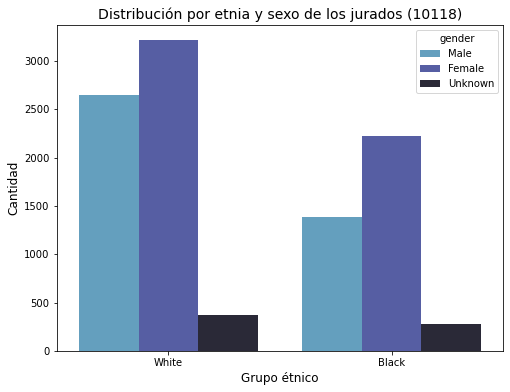

In [48]:
sns.set_palette("YlOrBr")
plt.figure(figsize=(8,6))
sns.countplot(x='race', data=data_jurors, hue='gender')
plt.xlabel('Grupo étnico', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title(f'Distribución por etnia y sexo de los jurados ({len(data_jurors)})', fontsize=14)
plt.show()

In [49]:
data_jurors.pivot_table(index = 'race', columns = 'gender', aggfunc = {'id' : 'count'})

id              
gender Female  Male Unknown
race                       
Black    2221  1381     275
White    3217  2650     374

In [50]:
#Creación de variables dummies para la tabla de jurados
col_dummies = ['race', 'gender']
dummy_df = pd.get_dummies(data_jurors[col_dummies], drop_first=True)
data_jurors = pd.concat([data_jurors.drop(col_dummies, axis=1), dummy_df], axis=1)

In [51]:
#cantidad de jurados
print(f'Cantidad de jurados: {len(data_jurors.id.unique())}')

Cantidad de jurados: 10118


In [52]:
#cantidad de juicios
print(f'Cantidad de juicios: {len(data_jurors.trial__id.unique())}')

Cantidad de juicios: 226


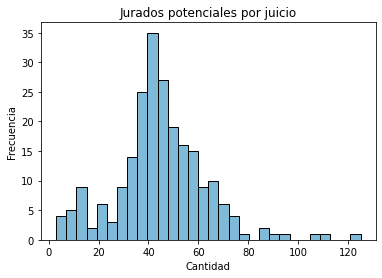

In [53]:
# cantidad de potenciales jurados evaluados por juicio

juror_x_trial = data_jurors.groupby('trial__id').agg(
    count_juror=pd.NamedAgg(column="id", aggfunc="count")
)

# juror_x_trial['count_juror'].hist(bins=30) #--> graficar serie directamente
sns.histplot(data=juror_x_trial, x='count_juror', bins=30)

plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.title('Jurados potenciales por juicio')
plt.show()

In [54]:
juror_x_trial.sort_values(by='count_juror').describe()

,count_juror
count,226.000000
mean,44.769912
std,18.286368
min,3.000000
25%,36.000000
50%,44.000000
75%,53.000000
max,125.000000


-Promedio de jurados por juicio: 48

-Mínimo de jurados en un juicios : 19

-Máximo de jurados en un juicios : 130


Both State and Defense    3503
State                     1626
Defense                    155
Neither                    136
Name: strike_eligibility, dtype: int64
Valores nulos  4698
Total de datos  10118


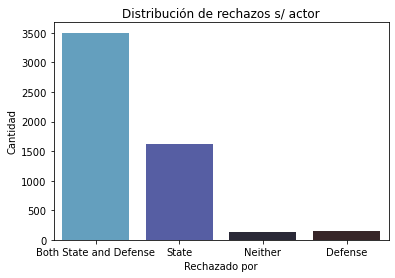

In [55]:
print(data_jurors.strike_eligibility.value_counts())
print(f'Valores nulos ' , data_jurors.strike_eligibility.isna().sum())
print(f'Total de datos ', data_jurors.strike_eligibility.shape[0])

sns.countplot(x='strike_eligibility', data=data_jurors)
plt.xlabel('Rechazado por')
plt.ylabel('Cantidad')
plt.title('Distribución de rechazos s/ actor')
plt.show()

In [56]:
data_jurors_struck_by=pd.DataFrame(data_jurors.struck_by)

In [57]:
#Agrupamos los valores de la variable target (elegido o rechazado)

etiquetas_struck_by = { 
             'Juror chosen to serve on jury': 'Elegido',
             'Juror not struck':  'No rechazado',
             'Struck by the defense':  'Por la defensa',
             'Struck for cause':  'Por causa',
             'Struck by the state':  'Por el estado',
             'Struck without notation': 'Rechazada sin notación',
             'Juror excused/absent': 'Exhimido/Ausente',
             'Juror chosen as alternate': 'Suplente',
             'Unknown': 'Desconocido'
             }


data_jurors_struck_by['struck_by'] = data_jurors_struck_by['struck_by'].map(etiquetas_struck_by)

Valores nulos  0
Total de datos  10118


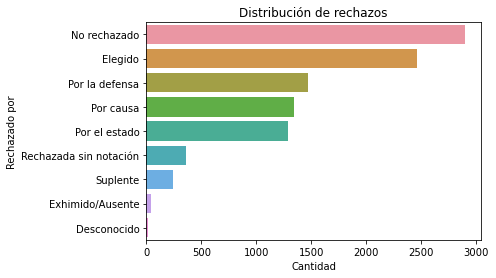

No rechazado              2900
Elegido                   2462
Por la defensa            1466
Por causa                 1342
Por el estado             1285
Rechazada sin notación     362
Suplente                   240
Exhimido/Ausente            43
Desconocido                 18
Name: struck_by, dtype: int64


In [78]:
print(f'Valores nulos ' , data_jurors_struck_by.struck_by.isna().sum())
print(f'Total de datos ', data_jurors_struck_by.struck_by.shape[0])

#Analizamos la correlación que existe entre algunas de las variables
orden=data_jurors_struck_by.struck_by.value_counts().index

sns.countplot(y='struck_by', data=data_jurors_struck_by, order=orden)
plt.xlabel('Cantidad')
plt.ylabel('Rechazado por')
plt.title('Distribución de rechazos')
plt.show()


print(data_jurors_struck_by.struck_by.value_counts())

In [59]:
data_jurors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10118 entries, 0 to 14873
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  10118 non-null  int64 
 1   trial__id           10118 non-null  int64 
 2   struck_by           10118 non-null  object
 3   strike_eligibility  5420 non-null   object
 4   year                10118 non-null  int32 
 5   race_White          10118 non-null  uint8 
 6   gender_Male         10118 non-null  uint8 
 7   gender_Unknown      10118 non-null  uint8 
dtypes: int32(1), int64(2), object(2), uint8(3)
memory usage: 722.4+ KB


------------------------

LECTURA DATOS DE JUICIOS

In [60]:
data_trials = pd.read_csv("trials.csv")
data_trials.head(5)

,id,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,...,offense_code_5,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present
0,1,Terry L. Landingham,1993-9826,False,False,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
1,2,Donovan Johnson,2009-0023,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
2,3,Sparky Watson,2004-0257,True,True,Grenada,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
3,4,Phillip Knickel,1998-0020,False,True,Montgomery,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True
4,5,Donald Dotson,1994-9918,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,Guilty on at least one offense,True,True,False,True


In [61]:
data_trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           305 non-null    int64  
 1   defendant_name               305 non-null    object 
 2   cause_number                 305 non-null    object 
 3   state_strikes                305 non-null    bool   
 4   defense_strikes              305 non-null    bool   
 5   county                       305 non-null    object 
 6   defendant_race               305 non-null    object 
 7   second_defendant_race        15 non-null     object 
 8   third_defendant_race         2 non-null      object 
 9   fourth_defendant_race        0 non-null      float64
 10  more_than_four_defendants    305 non-null    bool   
 11  judge                        305 non-null    object 
 12  prosecutor_1                 303 non-null    object 
 13  prosecutor_2        

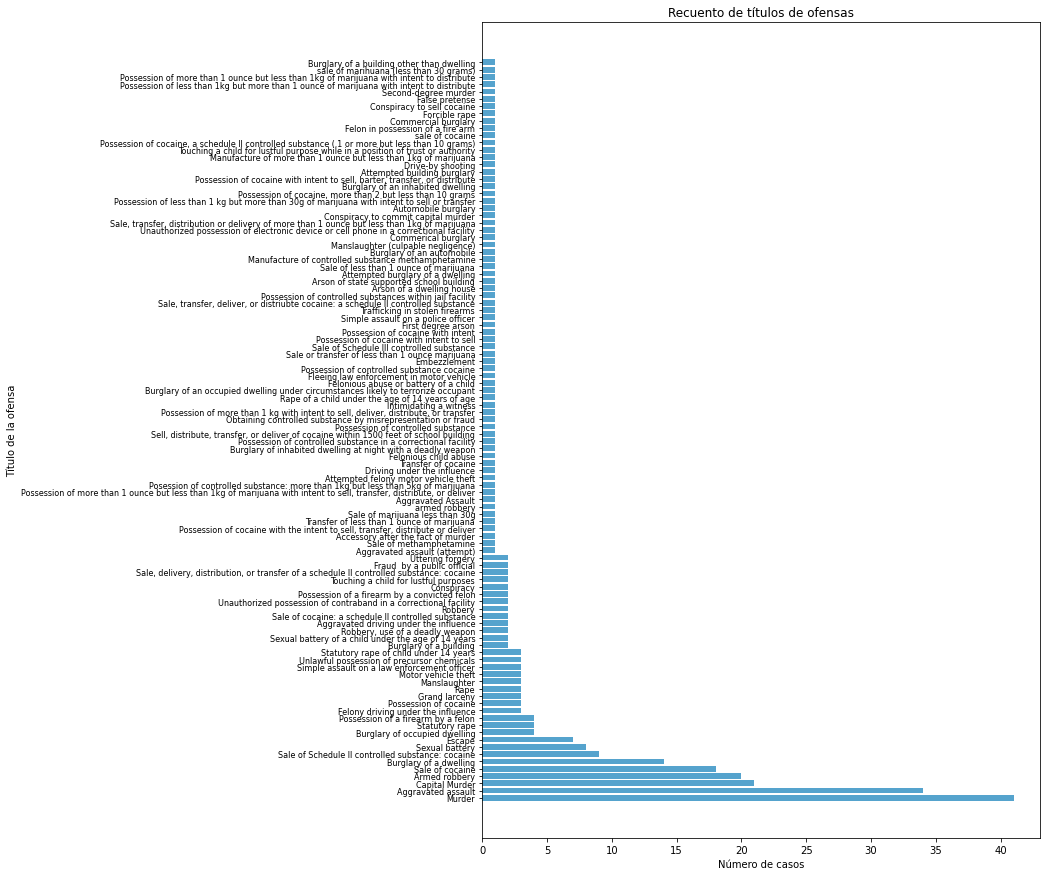

In [62]:
import matplotlib.pyplot as plt


sns.set_palette("icefire")
# Calcular el conteo de cada valor único en la columna 'offense_title_1'
value_counts = data_trials.offense_title_1.value_counts()

# Crear una figura con un tamaño personalizado
fig = plt.figure(figsize=(10, 15))

# Crear un gráfico de barras horizontal dentro de la figura
plt.barh(value_counts.index, value_counts.values)

# Ajustar el tamaño de la fuente de las etiquetas en el eje y a 8 puntos
plt.tick_params(axis='y', labelsize=8)

# Añadir títulos y etiquetas de los ejes
plt.title('Recuento de títulos de ofensas')
plt.xlabel('Número de casos')
plt.ylabel('Título de la ofensa')

# Mostrar el gráfico
plt.show()


In [63]:
from collections import Counter

In [64]:
all_words = []
for row in data_trials['offense_title_1']:
    words = row.lower().split()
    all_words.extend(words)

In [65]:
stopwords = ['manslaughter', 'murder','assault','possession','burglary','dwelling','robbery','substance','rape','marijuana','cocaine','battery', 'theft'] 
filtered_words = [word for word in all_words if word in stopwords]
word_counts = Counter(filtered_words)

In [66]:
word_counts_list = list(word_counts.items())
word_counts_list.sort(key=lambda x: x[1], reverse=True)

print("Cantidad de palabras encontradas:", len(word_counts_list))
print("Palabras más utilizadas:")

words = []

for word, count in word_counts_list:
    words.append(word)
    print(f"{word}: {count}")

Cantidad de palabras encontradas: 13
Palabras más utilizadas:
murder: 65
cocaine: 41
assault: 40
possession: 31
burglary: 30
dwelling: 24
robbery: 23
rape: 12
battery: 11
marijuana: 11
substance: 10
manslaughter: 4
theft: 4


In [67]:
print(words)

['murder', 'cocaine', 'assault', 'possession', 'burglary', 'dwelling', 'robbery', 'rape', 'battery', 'marijuana', 'substance', 'manslaughter', 'theft']


In [68]:
# Filtra las filas del DataFrame que contienen al menos una palabra de la lista "words"
filtered_data = data_trials[data_trials['offense_title_1'].str.lower().str.contains('|'.join(words))]

# Crea una nueva columna "ofensa" que contiene la palabra encontrada en la columna "data_trials.offense_title_1"
filtered_data['ofensa'] = filtered_data['offense_title_1'].apply(lambda x: [word for word in words if word in x.lower()][0])

# filtered_data[['offense_title_1','ofensa']].sample(10)


<ipython-input-68-858a7d6d4fb6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ofensa'] = filtered_data['offense_title_1'].apply(lambda x: [word for word in words if word in x.lower()][0])


In [69]:
#Creación columna de agrupamiento de delitos en dataframe de juicios
data_trials['offense'] = filtered_data.loc[:,'ofensa']
data_trials.sample(5)

,id,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,...,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present,offense
28,29,Dewayne Price,2007-0099C,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,NaN
249,251,Curtis Flowers I,1997-7447,False,False,Montgomery,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,True,False,True,murder
87,88,Krishun Williams,1998-0011C-D,True,True,Grenada,Black,Black,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,True,False,True,NaN
14,15,Oscar Fleming,1999-0015,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,cocaine
26,27,Frederick Miller,2007-0004A,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,murder


In [70]:
data_trials['offense'].fillna('other', inplace=True)

In [71]:
#Hacemos un agrupamiento final por tipo de crimen
etiquetas_ofensas = {
    'murder': 'Homicide-related',
    'manslaughter': 'Homicide-related',
    'assault': 'Assault-related',
    'possession': 'Drug-related',
    'cocaine': 'Drug-related',
    'marijuana': 'Drug-related',
    'substance': 'Drug-related',
    'robbery': 'Robbery-related',
    'dwelling': 'Robbery-related',
    'theft': 'Robbery-related',
    'burglary': 'Robbery-related',
    'rape': 'Sexual-related',
    'battery': 'Sexual-related',
    'other': 'Miscellaneous'
}
data_trials['offense'] = data_trials['offense'].map(etiquetas_ofensas)


In [72]:
data_trials.head()

,id,defendant_name,cause_number,state_strikes,defense_strikes,county,defendant_race,second_defendant_race,third_defendant_race,fourth_defendant_race,...,offense_title_5,offense_code_6,offense_title_6,more_than_six,verdict,case_appealed,batson_claim_by_defense,batson_claim_by_state,voir_dire_present,offense
0,1,Terry L. Landingham,1993-9826,False,False,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,Assault-related
1,2,Donovan Johnson,2009-0023,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,Drug-related
2,3,Sparky Watson,2004-0257,True,True,Grenada,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,Miscellaneous
3,4,Phillip Knickel,1998-0020,False,True,Montgomery,White,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,False,False,True,Robbery-related
4,5,Donald Dotson,1994-9918,False,True,Attala,Black,NaN,NaN,NaN,...,NaN,NaN,NaN,False,Guilty on at least one offense,True,True,False,True,Assault-related


In [73]:
data_trials.drop(['offense_code_1','offense_title_1'], axis=1,inplace= True)

In [74]:
data_trials['offense'] = data_trials['offense'].astype(str)

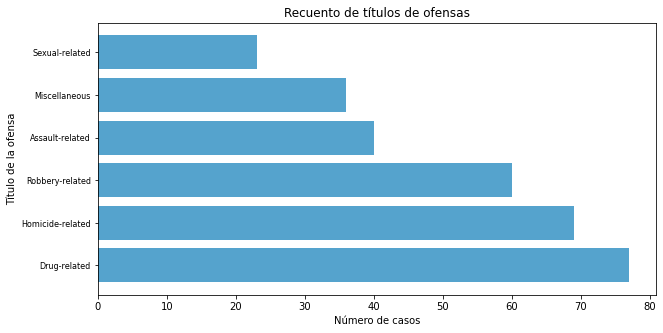

In [75]:
import matplotlib.pyplot as plt

# Calcular el conteo de cada valor único en la columna 'offense_title_1'
value_counts = data_trials.offense.value_counts()

# Crear una figura con un tamaño personalizado
fig = plt.figure(figsize=(10, 5))

# Crear un gráfico de barras horizontal dentro de la figura
plt.barh(value_counts.index, value_counts.values)

# Ajustar el tamaño de la fuente de las etiquetas en el eje y a 8 puntos
plt.tick_params(axis='y', labelsize=8)

# Añadir títulos y etiquetas de los ejes
plt.title('Recuento de títulos de ofensas')
plt.xlabel('Número de casos')
plt.ylabel('Título de la ofensa')

# Mostrar el gráfico
plt.show()


In [76]:
data_trials['offense'].value_counts()

Drug-related        77
Homicide-related    69
Robbery-related     60
Assault-related     40
Miscellaneous       36
Sexual-related      23
Name: offense, dtype: int64

In [77]:
import plotly.express as px

fig = px.histogram(data_trials, x="defendant_race", title="Distribución de la raza de los acusados",color='defendant_race')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
#Selección de las categorías 'Black' y 'White' la columna 'race' para los juicios
mask_trials = ['Black', 'White']
data_trials_mask = data_trials['defendant_race']. apply(lambda x: x in mask_trials)
data_trials_2 = data_trials.loc[data_trials_mask]
data_trials = data_trials_2

In [ ]:
#Eliminación columnas irrelevantes o con pocos datos
data_trials.drop(columns=['offense_code_2','offense_title_2','offense_code_3','offense_title_3','defendant_name','cause_number','second_defendant_race','third_defendant_race','fourth_defendant_race','prosecutor_1','prosecutor_2','prosecutor_3','def_attny_1','def_attny_2','def_attny_3','offense_code_4','offense_code_5','offense_code_6','offense_title_4','offense_title_5','offense_title_6','prosecutors_more_than_three','def_attnys_more_than_three','more_than_six','verdict','case_appealed','voir_dire_present','more_than_four_defendants'],inplace=True)

In [ ]:
#Conservamos 10 columnas de las 38 iniciales
data_trials.shape

In [ ]:
import plotly.express as px

fig = px.histogram(data_trials, x="defendant_race",labels=None,title="Distribución de la raza de los acusados",color='defendant_race')
fig.show()
#color_discrete_sequence=['#1f77b4']

In [ ]:
#Distribución de los datos por condado
data_trials.county.value_counts()

In [ ]:
data_trials['judge'].value_counts()

In [ ]:
#Agrupamos los distintos jueces según cantidad de observaciones
etiquetas = {
    'Joseph Loper, Jr' :   'Joseph Loper, Jr',
    'C. Morgan, III'    :  'C. Morgan, III',
    'Other'              :  'Other',
    'George Mitchell'     :  'Other',
    'C. Morgan, Jr'        : 'Other'
}


data_trials['judge'] = data_trials['judge'].map(etiquetas)

In [ ]:
#Transformación de columnas booleanas a enteras
data_trials['state_strikes'] = data_trials.state_strikes.astype('int')
data_trials['defense_strikes'] = data_trials.defense_strikes.astype('int')
data_trials['batson_claim_by_state'] = data_trials.batson_claim_by_state.astype('int')
data_trials['batson_claim_by_defense'] = data_trials.batson_claim_by_defense.astype('int')

In [ ]:
#Creación de variables dummies para la tabla de juicios
data_trials = pd.get_dummies(data_trials, drop_first=True)
data_trials.head()

-------------------------------------------

LECTURA DATOS DE ENCUESTA A POSIBLES JURADOS

In [ ]:
data_voir_dire_answers = pd.read_csv("voir_dire_answers.csv")
data_voir_dire_answers.head()

In [ ]:
data_voir_dire_answers.info()

In [ ]:
#Seleccioón columnas booleanas y posterior transformación a enteras
list_columns = list(data_voir_dire_answers.select_dtypes('bool').columns)
list_columns

for col in list_columns:
    data_voir_dire_answers[col] = data_voir_dire_answers[col].astype(int)

In [ ]:
#Eliminación columnas irrelevantes
data_voir_dire_answers.drop(['notes','juror_id__trial__id'], axis = 1, inplace = True)

In [ ]:
print(data_voir_dire_answers.shape)
print(round(data_voir_dire_answers.married.value_counts()/data_voir_dire_answers.shape[0],3))
print()
print(round(data_voir_dire_answers.children.value_counts()/data_voir_dire_answers.shape[0],3))
print()
print(round(data_voir_dire_answers.religious.value_counts()/data_voir_dire_answers.shape[0],3))
print()
print(round(data_voir_dire_answers.education.value_counts()/data_voir_dire_answers.shape[0],3))

In [ ]:
#Resumen de columnas por tablas
print(f'Jurados:',data_jurors.columns)
print(f'Juicios:',data_trials.columns)
print(f'Encuesta:',data_voir_dire_answers.columns)

-------------------------------------------

UNIÓN DE TABLAS

In [ ]:
#Unimos tablas de jurados con juicios

merged_jurors_trials = pd.merge(data_jurors, data_trials, left_on='trial__id', right_on='id')
print(merged_jurors_trials.shape)

In [ ]:
merged_jurors_trials

In [ ]:
#Agrupamos los valores de la variable target (elegido o rechazado)

etiquetas = { 
             'Juror chosen to serve on jury': 1,
             'Juror not struck':  1,
             'Struck by the defense':  0,
             'Struck for cause':  0,
             'Struck by the state':  0,
             'Struck without notation': 0,
             'Juror excused/absent': 0,
             'Juror chosen as alternate': 1,
             'Unknown': 0
             }


merged_jurors_trials['struck_by_1'] = merged_jurors_trials['struck_by'].map(etiquetas)
merged_jurors_trials['struck_by'] = merged_jurors_trials['struck_by_1']
merged_jurors_trials.drop(['struck_by_1'], axis=1, inplace=True)
merged_jurors_trials

In [ ]:
#Renombramos la variable target para que guarde sentido con la agrupación anterior

merged_jurors_trials = merged_jurors_trials.rename(columns={'struck_by': 'chosen'})

In [ ]:
merged_jurors_trials.drop('strike_eligibility',axis=1, inplace = True)

In [ ]:
#Creación feature que discrimina según si el jurado es de la misma raza que en defendido o no

merged_jurors_trials['same_race'] = np.where(merged_jurors_trials['race_White'] == merged_jurors_trials['defendant_race_White'], 1, 0)

In [ ]:
merged_jurors_trials.columns

In [ ]:
# busqueda de columnas en comun
common_cols = set(data_jurors.columns).intersection(set(data_trials.columns)).intersection(set(data_voir_dire_answers.columns))
common_cols

In [ ]:
import networkx as nx

# Crear el grafo
G = nx.Graph()

# Agregar nodos (tablas)
G.add_node('Jurors')
G.add_node('Trials')
G.add_node('Survey')

# Agregar conexiones (columnas)
G.add_edge('Jurors', 'Trials', column='trial__id')
G.add_edge('Survey', 'Jurors', column='juror_id')

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Agregar etiquetas a las conexiones (columnas)
labels = {('Jurors', 'Trials'): 'trial__id', ('Survey', 'Jurors'): 'juror_id'}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


-id_x ---> id jurado

-id_y ---> id juicio

-id ---> id cuestionario

In [ ]:
#Unión tabla juradosxjuicios con encuesta

data = pd.merge(merged_jurors_trials , data_voir_dire_answers, left_on='id_x', right_on='juror_id')
print(data.shape)

data.head(5)

In [ ]:
data.columns

In [ ]:
merged_jurors_trials.isnull().sum().sort_values(ascending=False)

In [ ]:
#Distriución variable target

data.chosen.value_counts(normalize=True)

In [ ]:
counts = data.groupby('year')['chosen'].value_counts().unstack(fill_value=0)
counts['total'] = counts.sum(axis=1)
plt.plot(counts.loc[:, 0], 'o', label='0')
plt.plot(counts.loc[:, 1], 'o', label='1')
plt.plot(counts['total'], 'o', label='Total')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts of 0 and 1 by Year')
plt.legend()
plt.show()

------------------------

MODELOS

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score, KFold, StratifiedKFold

In [ ]:
#Dividimos la data entre variabla target (y) y las features selecciondas para predecir (X)

X = data.drop(['chosen', 'id_x','year', 'trial__id', 'id_y', 'id', 'juror_id', 'married', 'children', 'religious', 'education'], axis =1)
y = data['chosen']

In [ ]:
#Separamos la muestra entre train y test

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=41, shuffle=True)

MODELO  GAUSSIAN NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(X, y, test_size = 0.3, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train_gnb)

In [ ]:
y_pred_gnb = gnb.predict(X_test_gnb)
y_pred_gnb

In [ ]:
#Accuracy en train
accuracy_score(y_train_gnb, gnb.predict(X_train_gnb).round(3))

In [ ]:
#paleta colores
cmap = sns.color_palette("Greens_d", as_cmap=True)
vmin, vmax = 0, 500

In [ ]:
conf_mat = confusion_matrix(y_test_gnb, y_pred_gnb)
sns.heatmap(confusion_matrix(y_test_gnb, y_pred_gnb), annot=True, fmt='.0f',cmap=cmap, vmin=vmin, vmax=vmax)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

MODELO KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Definimos la estrategia de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size = 0.3, random_state=42)

for i in range(1, 21):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=kf)
    # cv_scores = cross_val_score(knn, X_train_gnb, y_train_gnb, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio': np.mean(cv_scores),
                      'score_std': np.std(cv_scores),
                      'n_neighbors': i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [ ]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores

In [ ]:
# Generamos los límites inferior y superior
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.head()

In [ ]:
# Graficamos los resultados
plt.plot(df_scores['n_neighbors'], df_scores['limite_inferior'], color = 'r')
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color = 'b')
plt.plot(df_scores['n_neighbors'], df_scores['limite_superior'], color = 'r')
plt.ylim(0.5, 0.8);

In [ ]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

In [ ]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(), 'n_neighbors'].values[0]
best_k

In [ ]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
knn = KNeighborsClassifier(n_neighbors=best_k)

# Generamos los datasets de train y test.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size = 0.3, random_state=42)

# Lo ajustamos sobre los datos de entrenamiento
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)

In [ ]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train_knn, knn.predict(X_train_knn)).round(2)

In [ ]:
# Evaluamos el accuracy del modelo en test
accuracy_score(y_test_knn, y_pred_knn)

In [ ]:
confusion_knn = confusion_matrix(y_test_knn, y_pred_knn)
sns.heatmap(confusion_matrix(y_test_knn, y_pred_knn), annot=True, fmt='.0f', cmap=cmap, vmin=vmin)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [ ]:
TP = confusion_knn[1, 1]; TN = confusion_knn[0, 0] ; FP = confusion_knn[0, 1] ; FN = confusion_knn[1, 0]
print('TP: ', TP,' TN: ', TN,' FP: ',FP,' FN: ',FN )

In [ ]:
print('Specificity=', (TN)/ (TN+FP))
print('Total de casos negativos predichos correctamente (TN) =',(TN))
print('Total de casos negativos (TN+FP) =',(TN+FP))

In [ ]:
print(recall_score(y_test_knn, y_pred_knn).round(2))

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X, y, test_size = 0.3, random_state= 42)
lg = LogisticRegression()
lg.fit(X_train_lg, y_train_lg)
y_pred_lg = lg.predict(X_test_lg)
print("Accuracy / Precisión = ", accuracy_score(y_test_lg, y_pred_lg).round(2))

In [ ]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train_lg, lg.predict(X_train_lg)).round(2)

In [ ]:
conf_mat_lg = confusion_matrix(y_test_lg, y_pred_lg)
sns.heatmap(confusion_matrix(y_test_lg, y_pred_lg), annot=True, fmt='.0f', cmap = cmap)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

XGBOOST

In [ ]:
from xgboost.sklearn import XGBClassifier
model_xg = XGBClassifier(n_jobs=-1, use_label_encoder=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {  
    "n_estimators": [50,100,500],      # Number of boosted trees to fit.
    "max_depth": [1,2,3,4],            # Maximum tree depth for base learners.
    "learning_rate": [0.01, 0.1],      # Boosting learning rate (xgb’s “eta”)
}

In [ ]:
xgb = GridSearchCV(model_xg, param_grid=params, cv=cv, verbose=1, n_jobs=-1)

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
xgb.best_params_

In [ ]:
def evaluar_rendimiento(modelo, nombre, X, y, cv):
    s = cross_val_score(modelo, X, y, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [ ]:
evaluar_rendimiento(xgb.best_estimator_,"XG Boost", X_train, y_train, cv)

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
from sklearn.metrics import roc_auc_score
xgb_auc = roc_auc_score(y_test, xgb.predict(X_test))
print("El valor del AUC es: ", xgb_auc)

In [ ]:
xgb.predict(X_test)

In [ ]:
recall_score(y_test, xgb.predict(X_test))

In [ ]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, xgb.predict_proba(X_test), plot_micro = False, plot_macro= False);

In [ ]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=10);

In [ ]:
y_pred = xgb.predict(X_test)
y_pred

In [ ]:
#paleta colores
cmap = sns.color_palette("Greens_d", as_cmap=True)
vmin, vmax = 100,900

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f',cmap=cmap, vmin=vmin, vmax=vmax)
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');